# Proceso exploratorio para la base de datos de AirBNB

## Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import ast
import numpy as np
from pathlib import Path
sys.path.insert(0, str((Path.cwd() / ".." / "src").resolve()))
from extraction import Extraction

## Conexión a la base de datos

In [2]:
uri = "mongodb://localhost:27017/"
db_name = "bi_mx"

extra = Extraction() #Creación del objeto de la clase Extraction
db = extra.mongodb_connection(uri, db_name)

Conexión exitosa a la base de datos: bi_mx


## Entendimiento general de los datos

### Primeras filas de cada colección

In [3]:
#Creación de los DF de las colecciones
df_listings = extra.load_mongodb_datasets(db, 'listings_mx')
df_calendar = extra.load_mongodb_datasets(db, 'calendar_mx')
df_reviews = extra.load_mongodb_datasets(db, 'reviews_mx')

#Cerrar la conexión con la base de datos
extra.close_mongodb_connection(uri)

In [4]:
#Obtención de las primeras filas de la colección listings
df_listings.head()

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,68b1b29599c73fe63e06d79b,35797,https://www.airbnb.com/rooms/35797,20250319150644,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68b1b29599c73fe63e06d79c,44616,https://www.airbnb.com/rooms/44616,20250319150644,2025-03-20,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,...,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.40
2,68b1b29599c73fe63e06d79d,56074,https://www.airbnb.com/rooms/56074,20250319150644,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,...,2011-04-02,2025-02-27,4.87,4.95,4.88,4.98,4.94,4.76,4.79,0.49
3,68b1b29599c73fe63e06d79e,67703,https://www.airbnb.com/rooms/67703,20250319150644,2025-03-20,previous scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,...,2011-11-17,2024-10-30,4.90,4.82,4.76,4.94,4.92,4.98,4.92,0.31
4,68b1b29599c73fe63e06d79f,70644,https://www.airbnb.com/rooms/70644,20250319150644,2025-03-22,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,2012-02-14,2024-12-28,4.92,4.91,4.96,4.96,4.98,4.96,4.92,0.83


In [23]:
#Obtención de las primeras filas de la colección calendar
df_calendar.head()

,_id,listing_id,date,available,price,minimum_nights,maximum_nights,adjusted_price
0,68ba3ad4c2b559caebfeba1e,287940,2025-03-20,False,$50.00,1.0,1125.0,NaN
1,68ba3ad4c2b559caebfeba1f,287940,2025-03-21,False,$50.00,1.0,1125.0,NaN
2,68ba3ad4c2b559caebfeba20,287940,2025-03-22,False,$50.00,1.0,1125.0,NaN
3,68ba3ad4c2b559caebfeba21,287940,2025-03-23,False,$50.00,1.0,1125.0,NaN
4,68ba3ad4c2b559caebfeba22,287940,2025-03-24,False,$50.00,1.0,1125.0,NaN


In [6]:
#Obtención de las primeras filas de la colección reviews
df_reviews.head()

,_id,listing_id,id,date,reviewer_id,reviewer_name,comments
0,68ba3a56c2b559caebeaa58b,44616,706908,2011-11-09,634733,Lindsay,Forget staying in a hotel. Stay at condesa hau...
1,68ba3a56c2b559caebeaa58c,44616,2006160,2012-08-16,3087087,Samuel,"Fantastic location, great place, friendly host..."
2,68ba3a56c2b559caebeaa58d,44616,3174954,2012-12-28,3234920,Anna,I would highly recommend Condesa Haus for anyo...
3,68ba3a56c2b559caebeaa58e,44616,3271579,2013-01-04,2199822,Shelley And Pall,Great stay. Thanks. Highly recommend.
4,68ba3a56c2b559caebeaa58f,44616,3841065,2013-03-19,2423825,Leonardo,This was not a very good experience I am afrai...


### Cantidad de registros y columnas

In [7]:
#Colección listings
n_rows, n_columns = df_listings.shape
print(f"Número de registros de la colección listings: {n_rows}")
print(f"Número de columnas de la colección listings: {n_columns}\n")

#Colección calendar
n_rows, n_columns = df_calendar.shape
print(f"Número de registros de la colección calendar: {n_rows}")
print(f"Número de columnas de la colección calendar: {n_columns}\n")

#Colección reviews
n_rows, n_columns = df_reviews.shape
print(f"Número de registros de la colección reviews: {n_rows}")
print(f"Número de columnas de la colección reviews: {n_columns}")

Número de registros de la colección listings: 26067
Número de columnas de la colección listings: 77

Número de registros de la colección calendar: 9514717
Número de columnas de la colección calendar: 8

Número de registros de la colección reviews: 1315986
Número de columnas de la colección reviews: 7


Teniendo en cuenta la gran cantidad de registros que tiene calendar, esto va a consumir muchos recursos de máquina mientras se hace el análisis exploratorio de los datos. Razón por la cual, durante este proceso se va a reducir el tamaño del dataframe, escogiendo los registros que pertenzcan a un trimestre específico. Esto  también puede ayudar a tener un análisis más profundo de la información de la colección y ver como se comportan las reservas.
Con lo cual, se procede a revisar qué trimestre comprende la colección:

In [32]:
#Trimestres en df_calendar
yq_counts = (
    df_calendar['date']
      .dt.to_period('Q')
      .value_counts()
      .sort_index()
)
print(yq_counts)

date
2025Q1     297742
2025Q2    2372097
2025Q3    2398164
2025Q4    2398164
2026Q1    2048550
Freq: Q-DEC, Name: count, dtype: int64


En este caso, se va a escoger el trimestre 2 del año 2025 (realmente no hay razón especíca, podría haber sido cualquiera. Todos, a excepción del trimestre 1 del 2025, aportan bastantes datos para hacer un buen análisis)

In [35]:
#Filtrar df_calendar por trimestre 2025Q2
year = 2025
quarter = 2

mask = (df_calendar['date'].dt.year == year) & (df_calendar['date'].dt.quarter == quarter)
df_calendar = df_calendar.loc[mask].copy()

In [36]:
#Revisando nuevamente la información de registros y columnas del df_calendar
n_rows, n_columns = df_calendar.shape
print(f"Número de registros de la colección calendar: {n_rows}")
print(f"Número de columnas de la colección calendar: {n_columns}\n")

Número de registros de la colección calendar: 2372097
Número de columnas de la colección calendar: 8



### Verificar tipos de datos

In [8]:
#Colección listings
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26067 entries, 0 to 26066
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   _id                                           26067 non-null  object        
 1   id                                            26067 non-null  int64         
 2   listing_url                                   26067 non-null  object        
 3   scrape_id                                     26067 non-null  int64         
 4   last_scraped                                  26067 non-null  datetime64[ns]
 5   source                                        26067 non-null  object        
 6   name                                          26067 non-null  object        
 7   description                                   25300 non-null  object        
 8   neighborhood_overview                         14391 non-null  obje

In [37]:
#Colección calendar
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372097 entries, 12 to 9514454
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   _id             object        
 1   listing_id      int64         
 2   date            datetime64[ns]
 3   available       bool          
 4   price           object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   adjusted_price  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 147.0+ MB


In [10]:
#Colección reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315986 entries, 0 to 1315985
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   _id            1315986 non-null  object        
 1   listing_id     1315986 non-null  int64         
 2   id             1315986 non-null  int64         
 3   date           1315986 non-null  datetime64[ns]
 4   reviewer_id    1315986 non-null  int64         
 5   reviewer_name  1315980 non-null  object        
 6   comments       1315986 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 70.3+ MB


## Calidad de los datos

### Valores nulos

#### Colección listings

In [39]:
#Sumatoria de nulos
df_listings.isna().sum().sort_values(ascending=False)

host_neighbourhood                              12192
neighbourhood                                   11676
neighborhood_overview                           11676
host_about                                      10456
host_location                                    5480
                                                ...  
calculated_host_listings_count_shared_rooms         0
instant_bookable                                    0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
Length: 77, dtype: int64

In [45]:
#Porcentaje de nulos
null_percentage = df_listings.isnull().mean().sort_values(ascending=False)*100
null_percentage.head(20)

host_neighbourhood             46.771780
neighbourhood                  44.792266
neighborhood_overview          44.792266
host_about                     40.112019
host_location                  21.022749
beds                           15.429470
bathrooms                      15.364254
price                          15.341236
estimated_revenue_l365d        15.341236
review_scores_value            12.513906
review_scores_location         12.513906
review_scores_checkin          12.513906
review_scores_communication    12.513906
review_scores_cleanliness      12.513906
review_scores_accuracy         12.513906
reviews_per_month              12.510070
first_review                   12.510070
review_scores_rating           12.510070
last_review                    12.510070
host_is_superhost               5.152108
dtype: float64

In [8]:
#Revisar columnas específicas con valores nulos
cols_con_nulos = df_listings.columns[df_listings.isnull().any()].tolist()
print(cols_con_nulos)

['description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'has_availability', 'estimated_revenue_l365d', 'host_neighbourhood', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


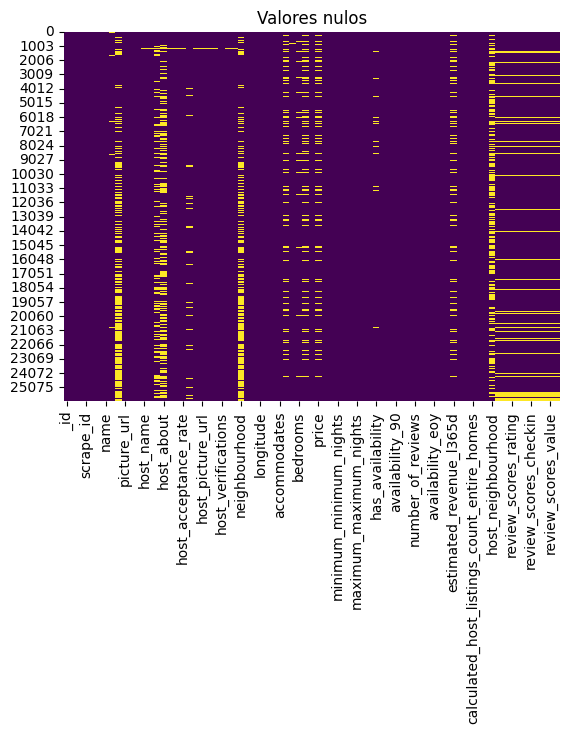

In [10]:
#Gráfica de nulos por columna
sns.heatmap(df_listings.isna(), cbar = False, cmap = 'viridis')
plt.title('Valores nulos')
plt.show()

In [50]:
#Examinar columnas con posibilidad de ser eliminadas
threshold = 0.5
cols_to_drop = null_percentage[null_percentage > threshold*100].index

print("Columnas a eliminar:")
print(cols_to_drop)

Columnas a eliminar:
Index([], dtype='object')


Si bien existen muchas columnas con valores vacíos, ninguna sobrepasa el umbral. Razón por la cual no serán eliminados por presentar estos espacios, pero sí pueden serlo si posteriormente se analiza que no tienen valor alguno para responder las preguntas de negocio.

#### Colección calendar

In [56]:
#Sumatoria de nulos
df_calendar.isnull().sum()

_id                     0
listing_id              0
date                    0
available               0
price                   0
minimum_nights          0
maximum_nights          0
adjusted_price    2371551
dtype: int64

In [57]:
#Porcentaje de nulos
null_percentage = df_calendar.isnull().mean()*100
print(null_percentage)

_id                0.000000
listing_id         0.000000
date               0.000000
available          0.000000
price              0.000000
minimum_nights     0.000000
maximum_nights     0.000000
adjusted_price    99.976982
dtype: float64


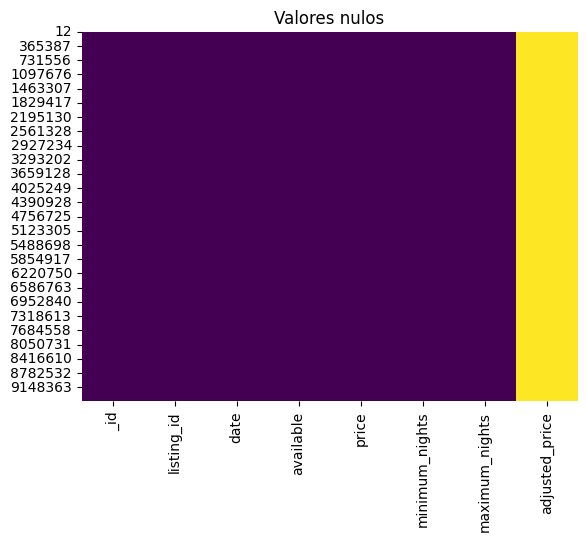

In [53]:
#Gráfica de nulos por columna
sns.heatmap(df_calendar.isna(), cbar = False, cmap = 'viridis')
plt.title('Valores nulos')
plt.show()

In [58]:
#Examinar columnas con posibilidad de ser eliminadas
threshold = 0.5
cols_to_drop = null_percentage[null_percentage > threshold*100].index

print("Columnas a eliminar:")
print(cols_to_drop)

Columnas a eliminar:
Index(['adjusted_price'], dtype='object')


En este caso, resulta que sí hay una columna que debería ser eliminada (adjusted_price). Algo que vale la pena destacar es que es bastante probable que en el dataset completo existan un puñado de valores vacíos en algunas columnas, pero estos perfectamente pueden ser imputados si así se requiere.

#### Colección reviews

In [14]:
#Sumatoria de nulos
df_reviews.isnull().sum()

_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    6
comments         0
dtype: int64

In [15]:
#Porcentaje de nulos
df_reviews.isnull().mean()*100

_id              0.000000
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000456
comments         0.000000
dtype: float64

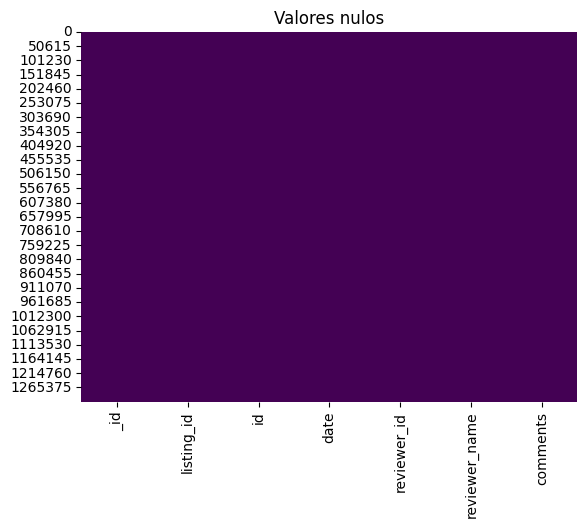

In [16]:
#Gráfica de nulos por columna
sns.heatmap(df_reviews.isna(), cbar = False, cmap = 'viridis')
plt.title('Valores nulos')
plt.show()

En el caso de reviews, prácticamente no hay valores vacíos. Lo mínimo que sí hay, se puede imputar sin ningún problema.

### Valores duplicados

In [59]:
#Colección listings
bad_cols = [c for c in df_listings.columns
            if df_listings[c].apply(lambda x: isinstance(x, (list, dict, set))).any()]

good_cols = [c for c in df_listings.columns if c not in bad_cols]

dupli_rows = df_listings[df_listings.duplicated(subset=good_cols)]
print(f"Registros duplicados de la colección listings: {dupli_rows.shape[0]}")

#Colección calendar
dupli_rows = df_calendar[df_calendar.duplicated()] 
print(f"Registros duplicados de la colección calendar: {dupli_rows.shape[0]}")

#Colección reviews
dupli_rows = df_reviews[df_reviews.duplicated()] 
print(f"Registros duplicados de la colección reviews: {dupli_rows.shape[0]}")

Registros duplicados de la colección listings: 0
Registros duplicados de la colección calendar: 0
Registros duplicados de la colección reviews: 0


Dado que en ninguna de las colecciones parece haber datos duplicados, no hay necesidad de hacer alguna operación en este sentido.

### Posibles valores atípicos

#### Limpieza y normalización de valores numéricos

In [4]:
# calendar
# Se utiliza el DataFrame filtrado por trimestre si existe (df_cal_q),
# de lo contrario se usa el dataset completo (df_calendar).

cal = df_cal_q if 'df_cal_q' in globals() else df_calendar
cal = cal.copy()

# Conversión de precios: de formato texto "$1,234.00" a número 1234.00
if 'price' in cal.columns:
    cal['price_num'] = (
        cal['price'].astype(str)                    # asegura tipo texto
        .str.replace(r'[\$,]', '', regex=True)      # elimina $ y comas
        .replace({'': np.nan})                      # reemplaza vacíos por NaN
        .astype(float)                              # convierte a número decimal
    )

# Conversión de columnas numéricas que pueden venir como texto
for c in ['minimum_nights', 'maximum_nights', 'listing_id']:
    if c in cal.columns:
        cal[c] = pd.to_numeric(cal[c], errors='coerce')  # fuerza conversión a número


# listings
# Copia del DataFrame original para evitar modificar el original
lst = df_listings.copy()

# Conversión de precios: de "$10,000.00" a 10000.00
if 'price' in lst.columns:
    lst['price_num'] = (
        lst['price'].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace({'': np.nan})
        .astype(float)
    )

# Conversión de variables numéricas relacionadas con capacidad y estructura
for c in ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'host_listings_count']:
    if c in lst.columns:
        lst[c] = pd.to_numeric(lst[c], errors='coerce')

# Conversión de tasas de respuesta y aceptación del anfitrión
# que vienen con el símbolo "%" (por ejemplo: "85%")
for c in ['host_response_rate', 'host_acceptance_rate']:
    if c in lst.columns:
        lst[c + '_pct'] = (                        # crea nuevas columnas *_pct
            lst[c].astype(str)
            .str.replace('%', '', regex=False)      # elimina el símbolo %
            .replace({'': np.nan, 'N/A': np.nan})   # reemplaza vacíos y 'N/A'
            .astype(float)                          # convierte a número
        )


# reviews
# Copia del DataFrame original de reseñas
rev = df_reviews.copy()

# Asegura que la columna de fecha tenga tipo datetime
# (por ejemplo, si viene como texto o diccionario JSON)
if 'date' in rev.columns and not np.issubdtype(rev['date'].dtype, np.datetime64):
    rev['date'] = pd.to_datetime(rev['date'], errors='coerce')


#### Funciones para detección de datos atípicos

In [64]:
def numeric_cols(df, exclude=None):
    # Devuelve una lista con las columnas numéricas de un DataFrame.

    exclude = set(exclude or [])
    return [
        c for c in df.columns
        if pd.api.types.is_numeric_dtype(df[c]) and c not in exclude
    ]

def outliers_iqr(df, cols, k=1.5):
    """
    Detecta valores atípicos utilizando el método del rango intercuartílico (IQR).
    Un valor se considera atípico si está por debajo de Q1 - k*IQR
    o por encima de Q3 + k*IQR.
    """
    flags = {}
    for c in cols:
        s = df[c].dropna()
        # Si la columna está vacía, se marca todo como False
        if s.empty:
            flags[c] = pd.Series(False, index=df.index)
            continue
        # Cálculo de cuartiles y rango intercuartílico
        q1, q3 = s.quantile(0.25), s.quantile(0.75)
        iqr = q3 - q1
        lo, hi = q1 - k * iqr, q3 + k * iqr
        # Marca como True los valores fuera del rango [lo, hi]
        flags[c] = (df[c] < lo) | (df[c] > hi)

    return pd.DataFrame(flags, index=df.index)

def outliers_iqr_by_group(df, cols, by, k=1.5):
    """
    Detecta outliers usando IQR, pero calculando los límites por grupo.
    Esto permite comparar los valores dentro de contextos similares
    (por ejemplo, por barrio o tipo de habitación).
    """
    flags = pd.DataFrame(False, index=df.index, columns=cols)

    # Se calcula el IQR dentro de cada grupo definido por 'by'
    for _, g in df.groupby(by, dropna=False):
        q1 = g[cols].quantile(0.25)
        q3 = g[cols].quantile(0.75)
        iqr = q3 - q1
        lo = q1 - k * iqr
        hi = q3 + k * iqr
        flags.loc[g.index, cols] = (g[cols] < lo) | (g[cols] > hi)

    return flags

def outliers_mad(df, cols, thresh=3.5):
    """
    Detecta valores atípicos utilizando la Desviación Absoluta Mediana (MAD),
    una alternativa robusta al z-score tradicional.
    """
    flags = {}
    for c in cols:
        med = df[c].median()
        mad = (df[c] - med).abs().median()

        # Si la MAD es 0 o NaN, se asume que no hay variabilidad
        if pd.isna(mad) or mad == 0:
            flags[c] = pd.Series(False, index=df.index)
        else:
            z = 0.6745 * (df[c] - med) / mad
            flags[c] = z.abs() > thresh

    return pd.DataFrame(flags, index=df.index)

def summarize_flags(flags_df, name='dataset'):
    # Resume los resultados de detección de outliers mostrando:

    perc = flags_df.mean().sort_values(ascending=False) * 100
    print(f'== {name}: % de filas marcadas por columna ==')

    if (perc > 0).any():
        print(perc[perc > 0].round(3))
    else:
        print('No se marcaron outliers por este método.')

    total_outliers = int(flags_df.any(axis=1).sum())
    print('Total filas con alguna marca:', total_outliers)

#### Reglas de negocio para detección de valores atípicos

In [65]:
#calendar
biz_cal = pd.DataFrame(index=cal.index)

# Reglas sobre el precio diario
# - price_neg: precios negativos (error)
# - price_zero: precios en cero (posible dato faltante)
# - price_gt_5000: precios muy altos, fuera del rango esperado del mercado
if 'price_num' in cal.columns:
    biz_cal['price_neg'] = cal['price_num'] < 0
    biz_cal['price_zero'] = cal['price_num'] == 0
    biz_cal['price_gt_5000'] = cal['price_num'] > 5000  # umbral ajustable según la ciudad o país

# Reglas sobre noches mínimas y máximas de reserva
# - *_neg: valores negativos no tienen sentido
# - *_gt_365: valores mayores a 365 días (poco realistas en Airbnb)
for c in ['minimum_nights', 'maximum_nights']:
    if c in cal.columns:
        biz_cal[f'{c}_neg'] = cal[c] < 0
        biz_cal[f'{c}_gt_365'] = cal[c] > 365


#listings
biz_lst = pd.DataFrame(index=lst.index)

# Reglas sobre capacidad y estructura
# - accomm_le0: capacidad menor o igual a 0 → inválida
# - accomm_gt30: capacidad muy alta (casas enormes o error)
if 'accommodates' in lst.columns:
    biz_lst['accomm_le0'] = lst['accommodates'] <= 0
    biz_lst['accomm_gt30'] = lst['accommodates'] > 30

# Reglas para número de habitaciones, baños y camas
# - *_neg: valores negativos imposibles
# - *_gt20: valores excesivos para un alojamiento típico
for c in ['bedrooms', 'bathrooms', 'beds']:
    if c in lst.columns:
        biz_lst[f'{c}_neg'] = lst[c] < 0
        biz_lst[f'{c}_gt20'] = lst[c] > 20

# Reglas para calificaciones (review_scores)
# - Los puntajes deben estar entre 0 y 5
for c in [col for col in lst.columns if col.startswith('review_scores_')]:
    if pd.api.types.is_numeric_dtype(lst[c]):
        biz_lst[f'{c}_out'] = ~lst[c].between(0, 5, inclusive='both')

# Reglas para tasas del anfitrión (%)
# - Deben estar entre 0 y 100
for c in ['host_response_rate_pct', 'host_acceptance_rate_pct']:
    if c in lst.columns:
        biz_lst[f'{c}_out'] = ~lst[c].between(0, 100, inclusive='both')

# Reglas para coordenadas geográficas
# - Latitud debe estar entre -90 y 90
# - Longitud debe estar entre -180 y 180
if 'latitude' in lst.columns:
    biz_lst['lat_out'] = ~lst['latitude'].between(-90, 90)
if 'longitude' in lst.columns:
    biz_lst['lon_out'] = ~lst['longitude'].between(-180, 180)


#reviews
biz_rev = pd.DataFrame(index=rev.index)

# Reglas sobre duplicidad e integridad temporal
# - dup_id: IDs de reseña duplicados (posible duplicado en carga)
# - date_null: fechas nulas o sin registrar
if 'id' in rev.columns:
    biz_rev['dup_id'] = rev['id'].duplicated(keep=False)
if 'date' in rev.columns:
    biz_rev['date_null'] = rev['date'].isna()

#### Colección listings

In [ ]:
# 1) Selección de columnas relevantes
cols_lst = [c for c in [
    # --- Precio y capacidad ---
    'price_num', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
    # --- Calificaciones ---
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    # --- Métricas del anfitrión ---
    'host_response_rate_pct', 'host_acceptance_rate_pct',
    # --- Reseñas y disponibilidad ---
    'reviews_per_month', 'number_of_reviews', 'number_of_reviews_l30d',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'availability_365', 'availability_90', 'availability_60', 'availability_30'
] if c in lst.columns]


# 2) Detección de outliers por IQR (rango intercuartílico)
by_cols = [c for c in ['neighbourhood_cleansed', 'room_type'] if c in lst.columns]

if by_cols:
    # --- IQR agrupado por contexto ---
    flags_lst_iqr = outliers_iqr_by_group(lst, cols_lst, by=by_cols, k=1.5)
else:
    # --- IQR global ---
    flags_lst_iqr = outliers_iqr(lst, cols_lst, k=1.5)


# 3) Detección de outliers por MAD (método robusto)
flags_lst_mad = outliers_mad(lst, cols_lst, thresh=3.5)


# 4) Resumen de resultados
summarize_flags(flags_lst_iqr, 'listings_IQR')
summarize_flags(flags_lst_mad, 'listings_MAD')
summarize_flags(biz_lst, 'listings_RULES')


# 5) Construcción del subconjunto de registros sospechosos
sus_lst = lst[
    flags_lst_iqr.any(axis=1) |    # al menos un outlier por IQR
    flags_lst_mad.any(axis=1) |    # al menos un outlier por MAD
    biz_lst.any(axis=1)            # al menos una regla de negocio incumplida
].copy()

# 6) Vista preliminar de los resultados
sus_lst.head()

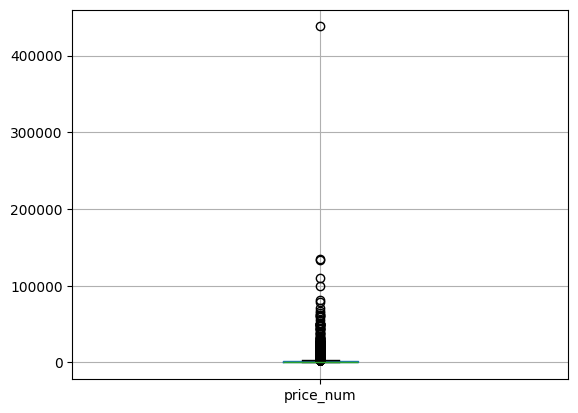

In [5]:
#Boxplot precio
lst.boxplot(column='price_num')
plt.show()

In [6]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['price_num'].idxmax(),['name', 'host_name', 'price_num']])

Máximo: name         Navidad en Depto. Premium Cerca de Polanco
host_name                                        Stefan
price_num                                      438053.0
Name: 24145, dtype: object


Price presenta valores atípicos. Esto es debido a que, analizando el nombre del valor máximo, por ejemplo, es una propiedad que solo está disponible para los tiempos navideños. Lo cual, a menos de que se quisiera saber información relacionada con esto, lo único que hace es generar ruido en los datos.

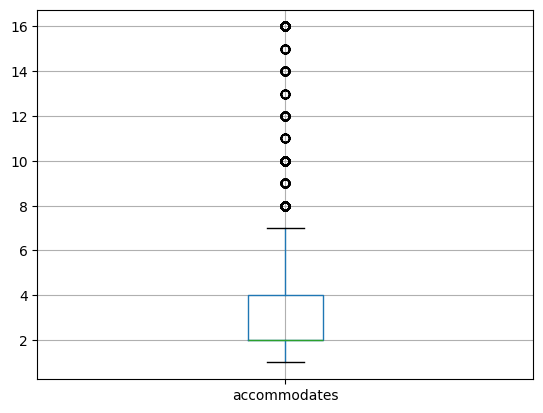

In [8]:
#Boxplot accommodates
lst.boxplot(column='accommodates')
plt.show()

In [7]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['accommodates'].idxmax(),['name', 'host_name', 'accommodates']])

Máximo: name            BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec
host_name                                    Francisco Carlos
accommodates                                               16
Name: 6, dtype: object


Accommodates presenta valores atípicos, pero no es necesario eliminarlo. Puesto que en el contexto de méxico, esta cantidad de alojados es bastante posible, pero poco común.

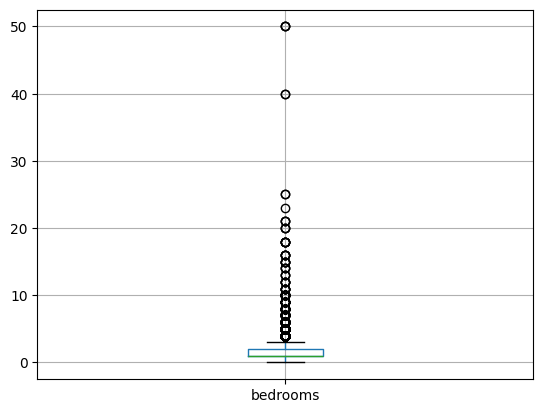

In [9]:
#Boxplot bedrooms
lst.boxplot(column='bedrooms')
plt.show()

In [10]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['bedrooms'].idxmax(),['name', 'host_name', 'bedrooms']])

Máximo: name         ✯ MASTER SUITES PRIME LOCATION ✯
host_name                                Thor
bedrooms                                 50.0
Name: 437, dtype: object


Bedrooms presenta valores atípicos, en donde se tienen una cantidad exagerada de habitaciones. No debería ser muy común tener 40 o 50 habitaciones, puesto que esto equivaldría a prácticamente alquilar un condominio completo.

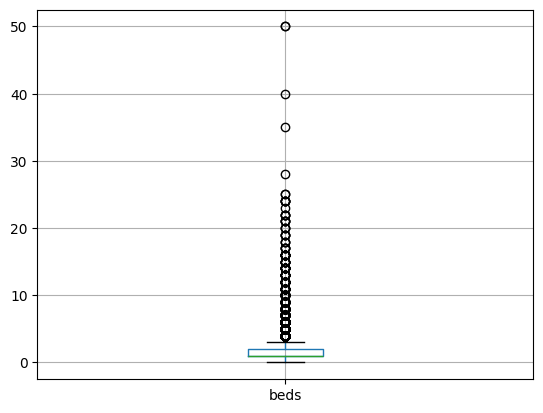

In [14]:
#Boxplot beds
lst.boxplot(column='beds')
plt.show()

In [13]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['beds'].idxmax(),['name', 'host_name', 'beds']])

Máximo: name         ✯ MASTER SUITES PRIME LOCATION ✯
host_name                                Thor
beds                                     50.0
Name: 437, dtype: object


Beds presenta valores atípicos, teniendo un resultado máximo de 50 camas. Algo muy poco probable, puesto que sería extremadamente raro que se presentara un alquiler que necesitace ese número.

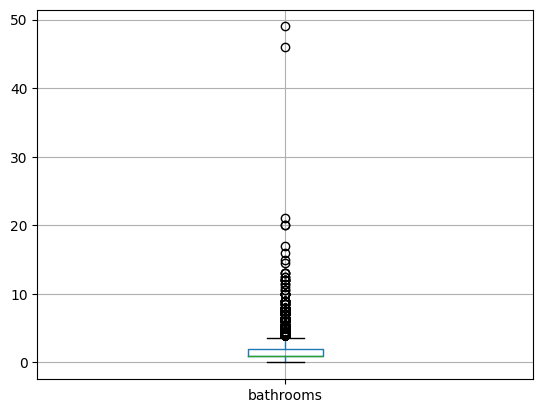

In [15]:
#Boxplot bathrooms
lst.boxplot(column='bathrooms')
plt.show()

In [16]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['bathrooms'].idxmax(),['name', 'host_name', 'bathrooms']])

Máximo: name         ✯ High-end  Midtown Tower - All Suites
host_name                                      Thor
bathrooms                                      49.0
Name: 1461, dtype: object


Bathrooms presenta valores atípicos, puesto que no tiene sentido alguno tener 47 o 49 baños. Eso no es algo posible, más aún teniendo en cuenta como se ve la dispersión de los datos.

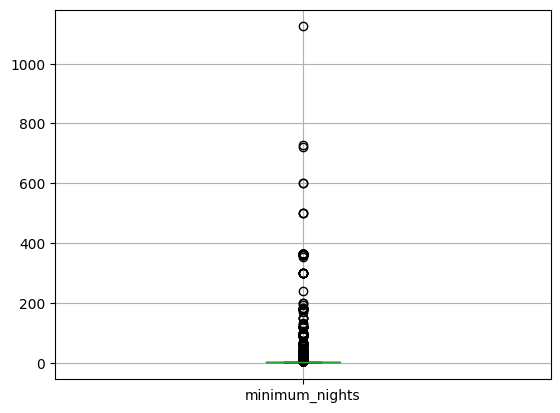

In [17]:
#Boxplot minimum_nights
lst.boxplot(column='minimum_nights')
plt.show()

In [18]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['minimum_nights'].idxmax(),['name', 'host_name', 'minimum_nights']])

Máximo: name              Departamento  con vista al castillo de Chapult...
host_name                                                   Gerardo
minimum_nights                                                 1125
Name: 1294, dtype: object


Minimum_nights presenta valores atípicos, teniendo un máximo de 1125 noches mínimas. Lo cuál no tiene sentido, dado que el número máximo de noches mínimas normalmente es de 365 (siendo que esto ya son casos algo extremos).

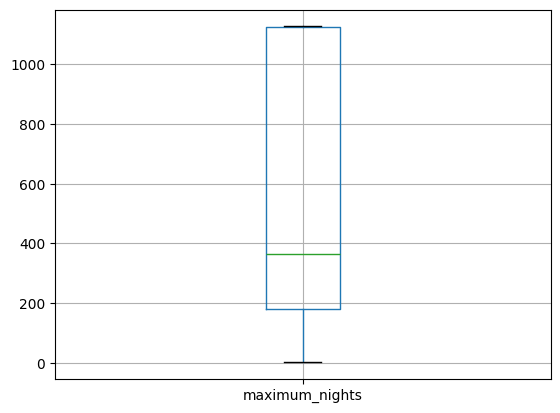

In [19]:
#Boxplot maximum_nights
lst.boxplot(column='maximum_nights')
plt.show()

Maximum_nights no presenta valores atípicos

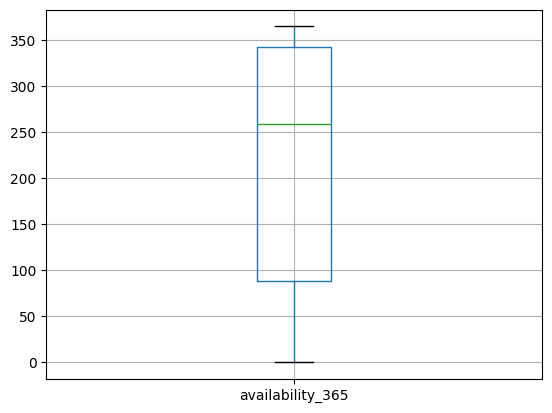

In [20]:
#Boxplot availability_365
lst.boxplot(column='availability_365')
plt.show()

Availability_365 no presenta valores atípicos

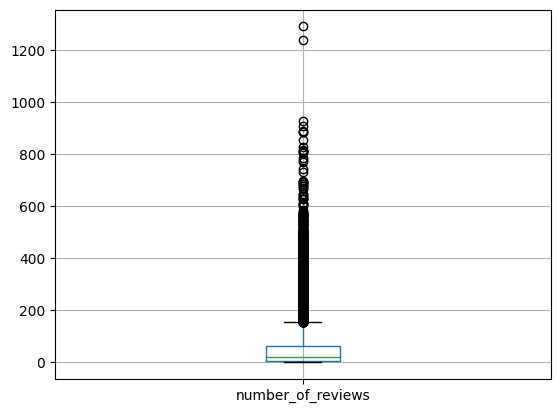

In [21]:
#Boxplot number_of_reviews
lst.boxplot(column='number_of_reviews')
plt.show()

In [22]:
#Revisar el valor máximo de la columna
print("Máximo:", lst.loc[lst['number_of_reviews'].idxmax(),['name', 'host_name', 'number_of_reviews']])

Máximo: name                 Private room in Buenavista CDMX breakfast incl...
host_name                                                        Isaac
number_of_reviews                                                 1291
Name: 8210, dtype: object


Number_of_reviews presenta valores atípicos, pero no es necesario eliminarlos. Puesto que en el caso de las reviews sí puede pasar que ciertas propiedades tengan un alto volúmen de reseñas, ya sea por su tipo o por la cantidad de tiempo en la plataforma.

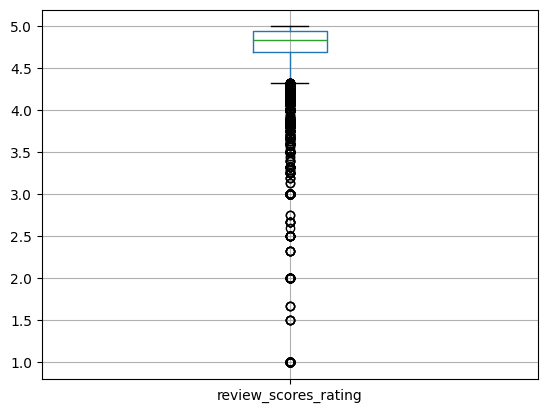

In [23]:
#Boxplot review_scores_rating
lst.boxplot(column='review_scores_rating')
plt.show()

In [24]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_rating'].idxmin(),['name', 'host_name', 'review_scores_rating']])

Mínimo: name                    Premium Stays Coyoacan Mexico
host_name                                      Rafael
review_scores_rating                              1.0
Name: 544, dtype: object


Review_scores_rating tiene valores atípicos que, en este caso, son negativos. En este caso, no es necesario eliminarlos, ya que son valores normales que pueden aparecer en cuanto a lo que se refiere a calificaciones. Esto simplemente son malas reseñas hechas a algunas propiedades.

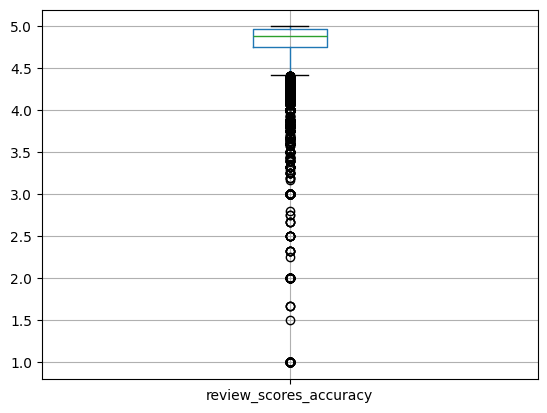

In [25]:
#Boxplot review_scores_accuracy
lst.boxplot(column='review_scores_accuracy')
plt.show()

In [26]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_accuracy'].idxmin(),['name', 'host_name', 'review_scores_accuracy']])

Mínimo: name                      Premium Stays Coyoacan Mexico
host_name                                        Rafael
review_scores_accuracy                              1.0
Name: 544, dtype: object


Review_scores_accuracy tiene valores atípicos que, en este caso, son negativos. Aquí tampoco es necesario eliminar ningún valor, por el mismo hecho de que son malas calificaciones.

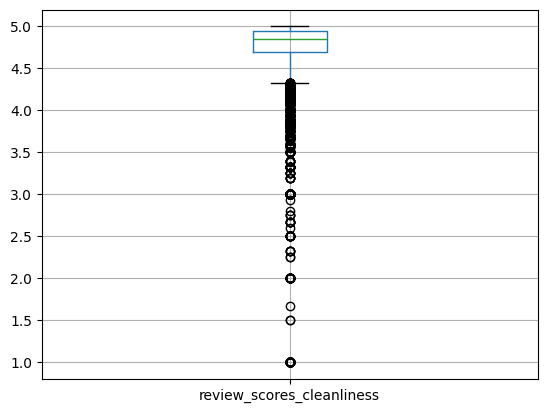

In [27]:
#Boxplot review_scores_cleanliness
lst.boxplot(column='review_scores_cleanliness')
plt.show()

In [28]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_cleanliness'].idxmin(),['name', 'host_name', 'review_scores_cleanliness']])

Mínimo: name                         Habitación (estacionamiento incluido)
host_name                                                   Ulises
review_scores_cleanliness                                      1.0
Name: 624, dtype: object


Review_scores_cleanliness tiene valores atípicos que, en este caso, son negativos. Aquí tampoco es necesario eliminar estos valores, porque simplemente son malas calificaciones.

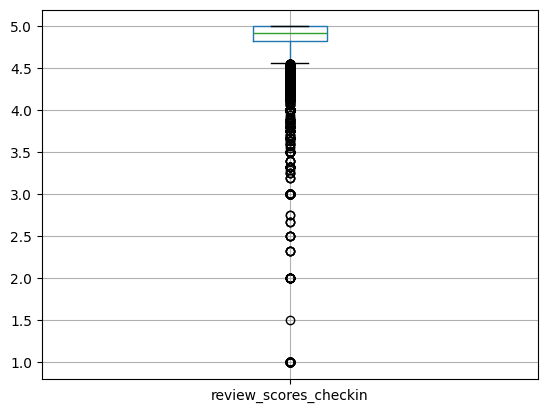

In [44]:
#Boxplot review_scores_checkin
lst.boxplot(column='review_scores_checkin')
plt.show()

In [43]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_checkin'].idxmin(),['name', 'host_name', 'review_scores_checkin']])

Mínimo: name                     Premium Stays Coyoacan Mexico
host_name                                       Rafael
review_scores_checkin                              1.0
Name: 544, dtype: object


Review_scores_checkin tiene valores atípicos que, en este caso, son negativos. Aquí tampoco es necesario eliminar estos valores, porque simplemente son malas calificaciones.

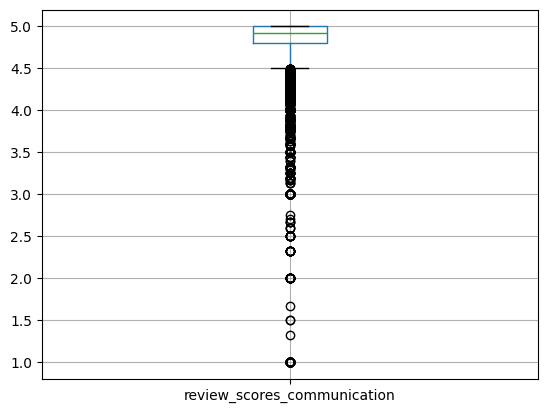

In [29]:
#Boxplot review_scores_communication
lst.boxplot(column='review_scores_communication')
plt.show()

In [30]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_communication'].idxmin(),['name', 'host_name', 'review_scores_communication']])

Mínimo: name                           Premium Stays Coyoacan Mexico
host_name                                             Rafael
review_scores_communication                              1.0
Name: 544, dtype: object


Review_scores_communication tiene valores atípicos que, en este caso, son negativos. Aquí tampoco es necesario eliminar nada, ya que también estos datos son de calificaciones negativas.

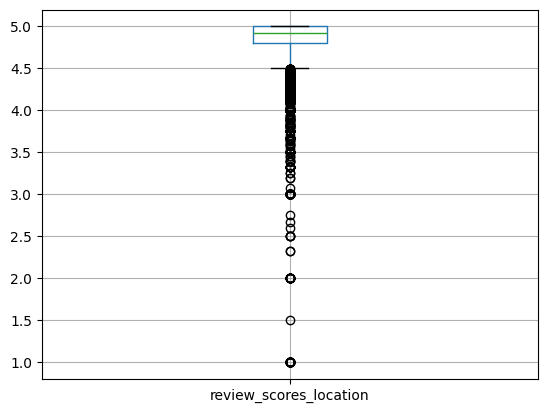

In [31]:
#Boxplot review_scores_location
lst.boxplot(column='review_scores_location')
plt.show()

In [32]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_location'].idxmin(),['name', 'host_name', 'review_scores_location']])

Mínimo: name                      Habitación (estacionamiento incluido)
host_name                                                Ulises
review_scores_location                                      1.0
Name: 624, dtype: object


Review_scores_location tiene valores atípicos que, en este caso, son negativos. Tampoco se deben eliminar, son solo malas calificaciones.

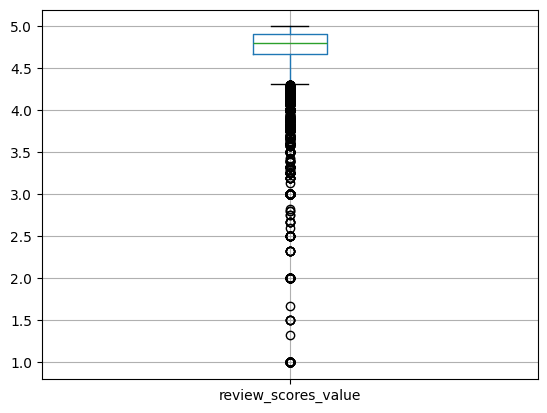

In [33]:
#Boxplot review_scores_value
lst.boxplot(column='review_scores_value')
plt.show()

In [34]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['review_scores_value'].idxmin(),['name', 'host_name', 'review_scores_value']])

Mínimo: name                   Premium Stays Coyoacan Mexico
host_name                                     Rafael
review_scores_value                              1.0
Name: 544, dtype: object


Review_scores_value tiene valores atípicos que, en este caso, son negativos. Estos datos tampoco hay que eliminarlos, por lo que son malas calificaciones.

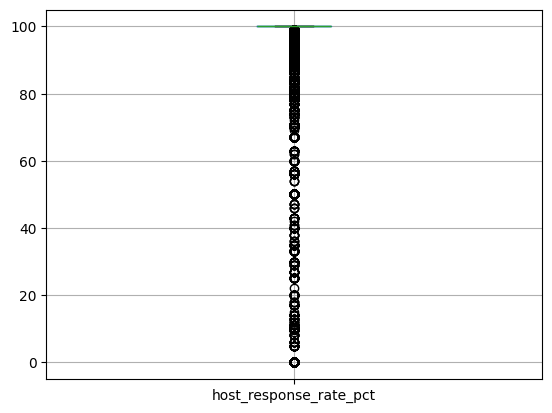

In [37]:
#Boxplot host_response_rate
lst.boxplot(column='host_response_rate_pct')
plt.show()

In [38]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['host_response_rate_pct'].idxmin(),['name', 'host_name', 'host_response_rate_pct']])

Mínimo: name                      Comfy clean Roøm @Cozy apartment
host_name                                             Sara
host_response_rate_pct                                 0.0
Name: 29, dtype: object


Host_response_rate tiene valores atípicos que, en este caso, son negativos. Estos no son necesario eliminarlos, dado que es un valor posible que puede ocurrir. No todos los anfitriones responen, sea la razón que sea. Esto puede ser in insight valioso para revisar si esto inside en la ocupación.

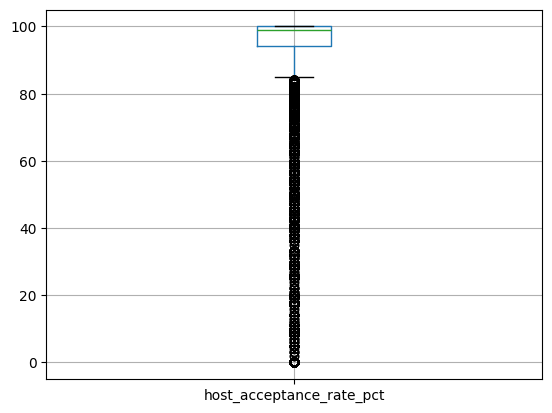

In [40]:
#Boxplot host_acceptance_rate
lst.boxplot(column='host_acceptance_rate_pct')
plt.show()

In [41]:
#Revisar el valor mínimo de la columna
print("Mínimo:", lst.loc[lst['host_acceptance_rate_pct'].idxmin(),['name', 'host_name', 'host_acceptance_rate_pct']])

Mínimo: name                        Comfy clean Roøm @Cozy apartment
host_name                                               Sara
host_acceptance_rate_pct                                 0.0
Name: 29, dtype: object


Host_acceptance_rate tiene valores atípicos que, en este caso, son negativos. Sin embargo, puede no ser necesario eliminarlos. Estos pueden ser valores extremos que podrían ser válidos, según el caso. El anfitrión puede que no haya aceptado aún invitaciones o que las deniegue todas y esto puede dar información valiosa para algunas de las preguntas de negocio.

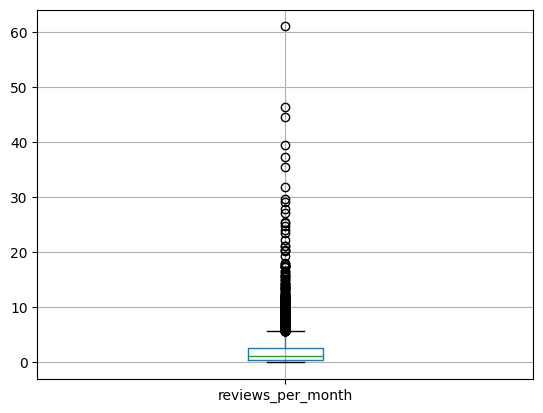

In [45]:
#Boxplot reviews_per_month
lst.boxplot(column='reviews_per_month')
plt.show()

In [47]:
#Revisar el valor mínimo de la columna
print("Máximo:", lst.loc[lst['reviews_per_month'].idxmax(),['name', 'host_name', 'reviews_per_month']])

Máximo: name                 Urban Hideout w/Pvt Balcony | Rtftop w/ City V...
host_name                                                   Iser Jaime
reviews_per_month                                                61.05
Name: 23520, dtype: object


#### Colección calendar

In [ ]:
# 1) Columnas a evaluar (solo se incluyen si existen en el DataFrame)
cols_cal = [c for c in ['price_num', 'minimum_nights', 'maximum_nights'] if c in cal.columns]

# 2) Flags de outliers estadísticos
#    - IQR: marca valores fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
flags_cal_iqr = outliers_iqr(cal, cols_cal, k=1.5)

#    - MAD: z-score robusto; marca valores con |z| > 3.5 (umbral por defecto)
flags_cal_mad = outliers_mad(cal, cols_cal, thresh=3.5)

# 3) Resumen de resultados (porcentaje de filas marcadas por columna)
#    Esto imprime en consola un pequeño reporte para cada método.
summarize_flags(flags_cal_iqr, 'calendar_IQR')
summarize_flags(flags_cal_mad, 'calendar_MAD')

#    Reglas de negocio (ya construidas en biz_cal) — precios negativos/cero, noches > 365, etc.
summarize_flags(biz_cal, 'calendar_RULES')

# 4) Subconjunto de filas sospechosas:
#    Incluye cualquier fila marcada por IQR, MAD o reglas de negocio.
sus_cal = cal[
    flags_cal_iqr.any(axis=1) |     # alguna columna marcada por IQR
    flags_cal_mad.any(axis=1) |     # alguna columna marcada por MAD
    biz_cal.any(axis=1)             # alguna regla de negocio activada
].copy()

# 5) Vista rápida (primeras filas) para inspección manual
sus_cal.head()

In [ ]:
#Copiar el dataset de calendar para hacer las cambios 
df_calendar_copy = df_calendar.copy()

In [ ]:
#Cambiar columna price a tipo float
df_calendar_copy['price'] = (df_calendar_copy['price'].astype(str)
                   .str.replace(r'[^0-9.\-]', '', regex=True)
                   .replace('', np.nan).astype(float))

In [ ]:
#Boxplot precio
df_calendar_copy.boxplot(column='price')
plt.show()

In [ ]:
#Revisar el valor máximo de la columna
print("Máximo:", df_calendar_copy.loc[df_calendar_copy['price'].idxmax(),['listing_id', 'price']])

Price presenta valores atípicos, pero siendo que es el precio de una reserva existente (son muchos registros con estos mismos valores, pero diferentes fechas), no sería conveniente borrarlo. Aunque vale la pena destacar el hecho de que ese id no aparece en la colección de listings, por lo que se debería evaluar de cerca este escenario y revisar la relevancia de estos documentos.

In [ ]:
#Boxplot minimum_nights
df_calendar_copy.boxplot(column='minimum_nights')
plt.show()

In [ ]:
#Revisar el valor máximo de la columna
print("Máximo:", df_calendar_copy.loc[df_calendar_copy['minimum_nights'].idxmax(),['listing_id', 'minimum_nights']])

Minimum_nights tiene valores atípicos, pero no sería necesario eliminarlos.

In [ ]:
#Boxplot maximum_nights
df_calendar_copy.boxplot(column='maximum_nights')
plt.show()

In [ ]:
#Revisar el valor máximo de la columna
print("Máximo:", df_calendar_copy.loc[df_calendar_copy['maximum_nights'].idxmax(),['listing_id', 'maximum_nights']])

Maxmimum_nights tiene valores atípicos, pero esta vez si hay que eliminarlos. Puesto que este valor no es el real que corresponde al listings_id mostrado en el registro, dado que esa propiedad tiene un máximo de nocches de 1125.

#### Colección Reviews

In [ ]:
# 1) Resumen de las reglas de negocio aplicadas
summarize_flags(biz_rev, 'reviews_RULES')

# 2) Subconjunto de registros sospechosos
sus_rev = rev[biz_rev.any(axis=1)].copy()

# 3) Vista rápida de los registros detectados
sus_rev.head()

Esta colección no tiene campos numéricos que se puedan evaluar en busca de datos atípicos.

## Transformaciones potenciales

### Desanidar campos

Dentro de todas las colecciones, solo listings tiene campos que deberían ser desanidados (listas o diccionarios). Siendo en este caso, las columnas de ammenities y la de host_verification.

Primero, se procede a desanidar el campo de host_verifications. Ante de hacerlo, se debe validar qué es lo que contiene la columna.

In [ ]:
#Contar valores únicos en la columna para buscar anomalias
df_listings["host_verifications"].value_counts().head(30)

Ahora, se procede a hacer el desanidado de la columna.

In [ ]:
#Convertir la columna de string a lista
def safe_eval(x): # Función para hacer la conversión
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []   # si hay error, devuelve lista vacía

df_listings_copy["host_verifications"] = df_listings["host_verifications"].apply(safe_eval)

#Convertir las listas de host_verifications en varias columnas independientes
df_expanded_hv = df_listings_copy["host_verifications"].apply(pd.Series)

#Renombrar las columnas creadas
df_expanded_hv.columns = [f"host_verification_{i+1}" for i in range(df_expanded_hv.shape[1])]

#Agregar estas columnas al dataset de listings
df_listings_copy_hv = pd.concat([df_listings_copy, df_expanded_hv], axis=1)

#Eliminar la columna vieja de host_verifications
df_listings_copy_hv = df_listings_copy_hv.drop(columns=["host_verifications"])

#Reorganizar columnas nuevas para que esten en la posición de la versión antigua
col1 = df_listings_copy_hv.pop("host_verification_1") #Sacar la columna 1 de verificación
df_listings_copy_hv.insert(24, "host_verification_1", col1) #Insertarla en la posición 24

col2 = df_listings_copy_hv.pop("host_verification_2") #Sacar la columna 2 de verificación
df_listings_copy_hv.insert(25, "host_verification_2", col2) #Insertarla en la posición 25

col3 = df_listings_copy_hv.pop("host_verification_3") #Sacar la columna 3 de verificación
df_listings_copy_hv.insert(26, "host_verification_3", col3) #Insertarla en la posición 26

In [ ]:
#Revisión del resultado de la operación
df_listings_copy_hv.info()

Comparando el resultado con la versión original:

In [ ]:
df_listings_copy_hv[['host_verification_1','host_verification_2','host_verification_3']]

In [ ]:
df_listings_copy['host_verifications']

Se puede apreciar que el cambio no afectó los datos.

Ahora, pasando a la columna de amenities:

In [ ]:
#Confirmar que amenities es una columna tipo lista
print(type(df_listings_copy_hv["amenities"].iloc[0]))

In [ ]:
#Expandir amenities en varias columnas
df_expanded_a = df_listings_copy_hv["amenities"].apply(pd.Series)
df_expanded_a.columns = [f"amenity_{i+1}" for i in range(df_expanded_a.shape[1])]

#Agregar y organizar las nuevas columnas al dataset
pos = 38
df_listings_copy_hv_a = pd.concat([df_listings_copy_hv.iloc[:, :pos], df_expanded_a, df_listings_copy_hv.iloc[:, pos:]], axis=1)

In [ ]:
#Resultado de la operación
df_listings_copy_hv_a.info()